# Edge detection (выделение границ)

In [48]:
from skimage.io import imread, imshow, imsave
from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing, disk, rectangle
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
from skimage import data
from scipy.signal import convolve2d
import numpy as np

In [2]:
import matplotlib.pyplot as plt
def compare_img(img1, img2, label1 = '', label2 = ''):
    fig = plt.figure(figsize=(10, 10))
    
    fig.add_subplot(1, 2, 1)
    imshow(img1)
    plt.axis('off')
    plt.title(label1)
    
    fig.add_subplot(1, 2, 2)
    imshow(img2)
    plt.axis('off')
    plt.title(label2)
    
    plt.show()

def show_img(img, label = ''):
    imshow(img)
    plt.axis('off')
    plt.title(label)
    
def save_img(img, filename):
    imsave(filename, img)

In [3]:
import time

def get_curent_time():
    return time.time()

def print_execution_time(start,end):
    return print(f'Finished in {end - start:.2f}sec')

In [44]:
def compare_3(img1, img2, img3, label1='', label2='', label3=''):
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    plt.title(label1)
    plt.imshow(img1)
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.axis('off')
    plt.title(label2)
    plt.imshow(img2)
    plt.subplot(1,3,3)
    plt.axis('off')
    plt.title(label3)
    plt.imshow(img3)

In [17]:
img = data.coffee()

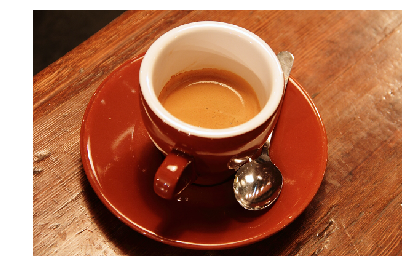

In [18]:
show_img(img)

## Выделение скачков яркости

In [19]:
imgGray = rgb2gray(img)

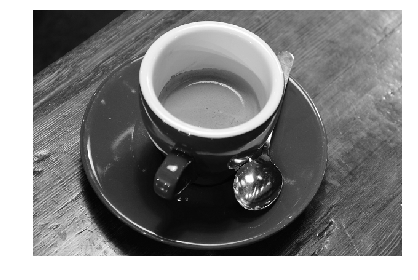

In [20]:
show_img(imgGray)

In [21]:
kernel_Dx = np.array([[0, 0, 0], 
                     [-1, 0, 1], 
                     [0, 0, 0]])

kernel_Dy = np.array([[0, 1, 0], 
                     [0, 0, 0], 
                     [0, -1, 0]])

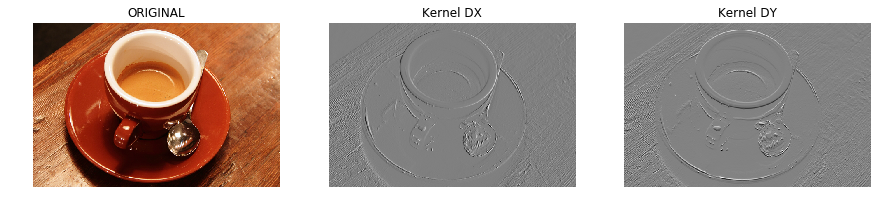

In [43]:
compare_3(img, convolve2d(imgGray, kernel_Dx, mode = "valid"), convolve2d(imgGray, kernel_Dy, mode = "valid"), 'ORIGINAL', 'Kernel DX', 'Kernel DY')


## Фильтр Превитта

In [29]:
kernel_Px = np.array([[-1, 0, 1], 
                     [-1, 0, 1], 
                     [-1, 0, 1]])

kernel_Py = np.array([[-1, -1, -1], 
                     [0, 0, 0], 
                     [1, 1, 1]])

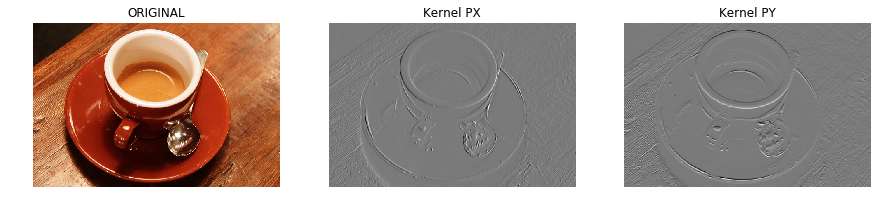

In [42]:
compare_3(img, convolve2d(imgGray, kernel_Px, mode = "valid"), convolve2d(imgGray, kernel_Py, mode = "valid"), 'ORIGINAL', 'Kernel PX', 'Kernel PY')


## Фильтр Собеля

In [33]:
kernel_Sx = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])

kernel_Sy = np.array([[-1, -2, -1], 
                     [0, 0, 0], 
                     [1, 2, 1]])

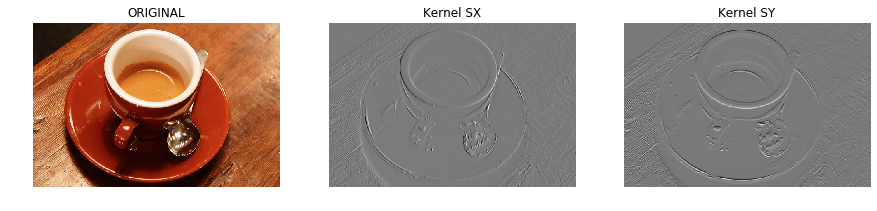

In [34]:
compare_3(img, convolve2d(imgGray, kernel_Sx, mode = "valid"), convolve2d(imgGray, kernel_Sy, mode = "valid"), 'ORIGINAL', 'Kernel SX', 'Kernel SY')


## Разностный аналог лапласиана

In [35]:
kernel_L1 = np.array([[0, 1, 0], 
                     [1, -4, 1], 
                     [0, 1, 0]])

kernel_L2 = np.array([[1, 1, 1], 
                     [1, -8, 1], 
                     [1, 1, 1]])

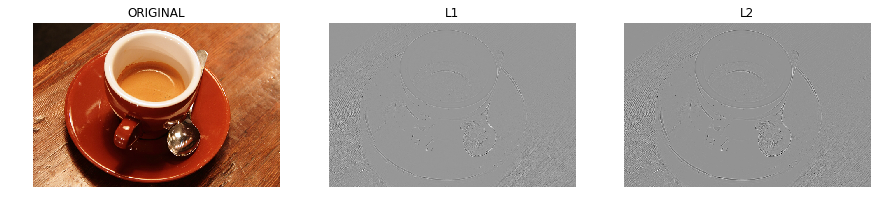

In [41]:
compare_3(img, convolve2d(imgGray, kernel_L1, mode = "valid"), convolve2d(imgGray, kernel_L2, mode = "valid"), 'ORIGINAL', 'L1', 'L2')


## Фильтр тиснения

In [37]:
kernel_E1 = np.array([[0, 1, 0], 
                     [1, 0, -1], 
                     [0, -1, 0]])

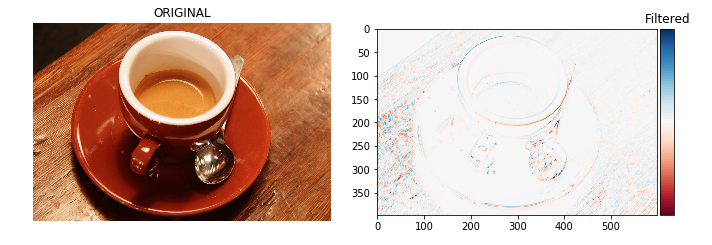

In [39]:
compare_img(img, convolve2d(imgGray, kernel_E1, mode = "valid"), 'ORIGINAL', 'Filtered',)


## Фильтр повышения контрастности

In [50]:
def high_contrast(img):
    kernel_KK1 = np.array([[-1, -1, -1], 
                     [-1, 9, -1], 
                     [-1, -1, -1]])
    
    img = rgb2yuv(img)
    Y = img[:,:,0]
    U = img[:,:,1]
    V = img[:,:,2]
    
    Y = convolve2d(Y, kernel_KK1, mode = "same")
    U = convolve2d(U, kernel_KK1, mode = "same")
    V = convolve2d(V, kernel_KK1, mode = "same")
    img = np.dstack((Y,U,V))
    img = yuv2rgb(img)
    img = np.clip(img, 0, 1)
    return img

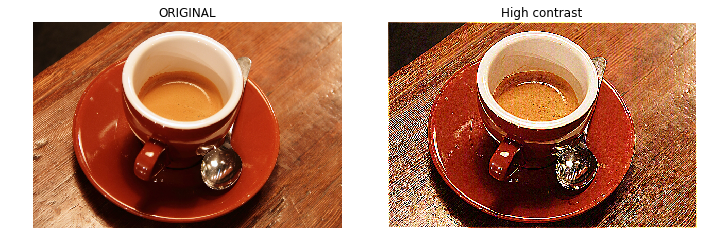

In [54]:
compare_img(img, high_contrast(img), 'ORIGINAL', 'High contrast')

## Выделение контуров изображений

In [52]:
from skimage import filters

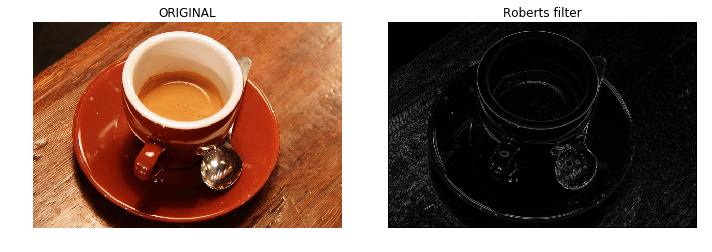

In [55]:
compare_img(img, filters.roberts(imgGray), 'ORIGINAL', 'Roberts filter')

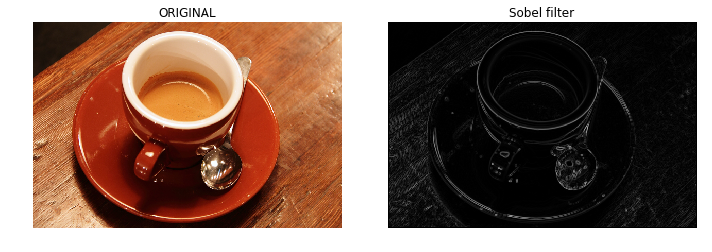

In [56]:
compare_img(img, filters.sobel(imgGray), 'ORIGINAL', 'Sobel filter')

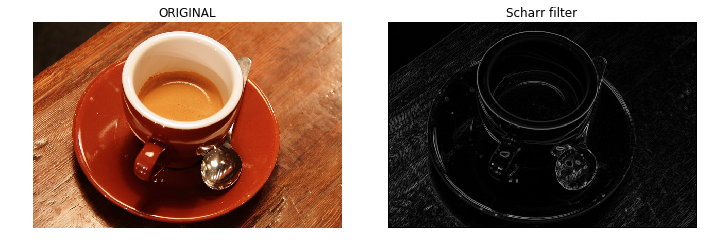

In [57]:
compare_img(img, filters.scharr(imgGray), 'ORIGINAL', 'Scharr filter')

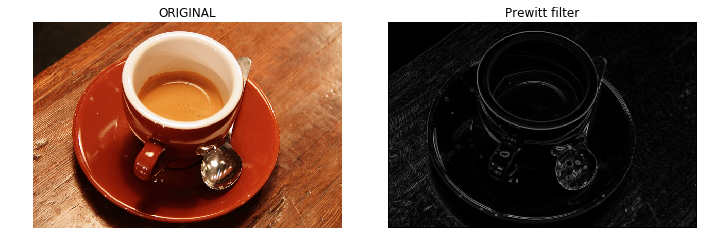

In [58]:
compare_img(img, filters.prewitt(imgGray), 'ORIGINAL', 'Prewitt filter')

***

С уважением, студент гр. РИМ-181226

Кабанов Е.А.